SEMINARIO DE SOLUCION DE PROBLEMAS DE INTELIGENCIA ARTIFICIAL I

Vázquez Pérez Ignacio David

218292866

Ingeniería en computación

## Algoritmo enjambre de Evolución Diferencial
Implementar y evaluar el rendimiento del algoritmo por Evolución Diferencial para las siguientes funciones:

- Sphere
- Rosenbrock
- Rastrigin
- Quartic

Para cada función realizar 5 ejecuciones con 2, 4 y 8 dimensiones, cada ejecución se detendrá a las 2000 generaciones.

Se deberá graficar el comportamiento del algoritmo; para ello se deberá promediar el valor del mejor fitness de las 5 ejecuciones en la generación 0, 100, 200, ... 2000. Se deberá generar una gráfica para cada dimensión y además una gráfica en la que se incluyan las ejecuciones para 2, 4 y 8 dimensiones, es decir un total de 4 gráficas por función.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import rosen

In [2]:
def sphere(x):
    return np.sum(x**2)

def rosenbrock(x):
    return np.sum(100*(x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2)

def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def quartic(x):
    return np.sum(np.arange(1, len(x) + 1) * x**4)

In [7]:
class DifferentialEvolution:
    def __init__(self, func, dim, bounds, num_runs=5, generations=2000, pop_size=50, mutation_factor=0.8, crossover_prob=0.7):
        self.func = func
        self.dim = dim
        self.bounds = bounds
        self.num_runs = num_runs
        self.generations = generations
        self.function_name = func.__name__
        self.pop_size = pop_size
        self.mutation_factor = mutation_factor
        self.crossover_prob = crossover_prob
        
    def initialize_population(self):
        return np.random.uniform(low=self.bounds[0], high=self.bounds[1], size=(self.pop_size, self.dim))
    
    def evaluate_population(self, population):
        return np.array([self.func(individual) for individual in population])
    
    def mutation(self, population, target_idx):
        a, b, c = np.random.choice(len(population), 3, replace=False)
        mutant_vector = population[a] + self.mutation_factor * (population[b] - population[c])
        return mutant_vector
    
    def crossover(self, target_vector, mutant_vector):
        trial_vector = np.copy(target_vector)
        for i in range(self.dim):
            if np.random.rand() < self.crossover_prob:
                trial_vector[i] = mutant_vector[i]
        return trial_vector
    
    def select_individual(self, target_vector, trial_vector):
        if self.func(trial_vector) < self.func(target_vector):
            return trial_vector
        else:
            return target_vector
    
    def evolve(self):
        best_fitness_per_generation = np.zeros((self.num_runs, self.generations+1))
        
        for run in range(self.num_runs):
            population = self.initialize_population()
            fitness = self.evaluate_population(population)
            best_fitness_per_generation[run, 0] = np.min(fitness)
            
            for gen in range(1, self.generations+1):
                new_population = np.zeros_like(population)
                for idx, target_vector in enumerate(population):
                    mutant_vector = self.mutation(population, idx)
                    trial_vector = self.crossover(target_vector, mutant_vector)
                    new_population[idx] = self.select_individual(target_vector, trial_vector)
                
                population = new_population
                fitness = self.evaluate_population(population)
                best_fitness_per_generation[run, gen] = np.min(fitness)
        
        avg_best_fitness = np.mean(best_fitness_per_generation, axis=0)
        return avg_best_fitness
    
    def plot(self):
        avg_best_fitness = self.evolve()
        plt.plot(avg_best_fitness)
        plt.title(f"Differential Evolution Performance on {self.function_name} Function ({self.dim}D)")
        plt.xlabel("Generation")
        plt.ylabel("Best Fitness")
        plt.grid(True)
        plt.show()


In [8]:
functions = [sphere, rosenbrock, rastrigin, quartic]
function_names = ['Sphere', 'Rosenbrock', 'Rastrigin', 'Quartic']
dimensions = [2, 4, 8]
num_runs = 5
generations = 2000
bounds = [(-5.12, 5.12), (-5, 10), (-5.12, 5.12), (-1.28, 1.28)]


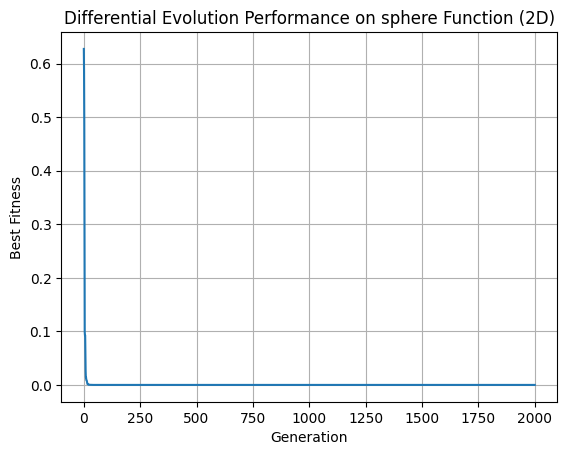

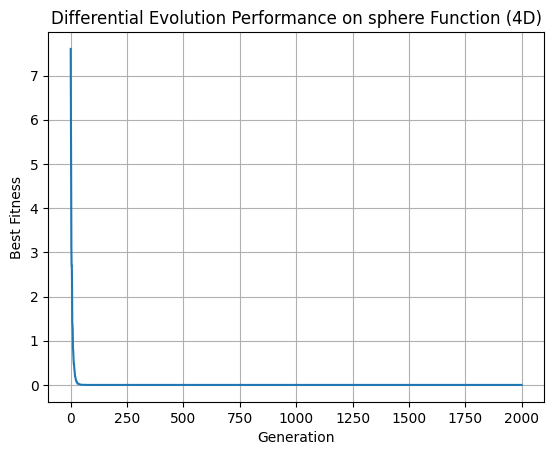

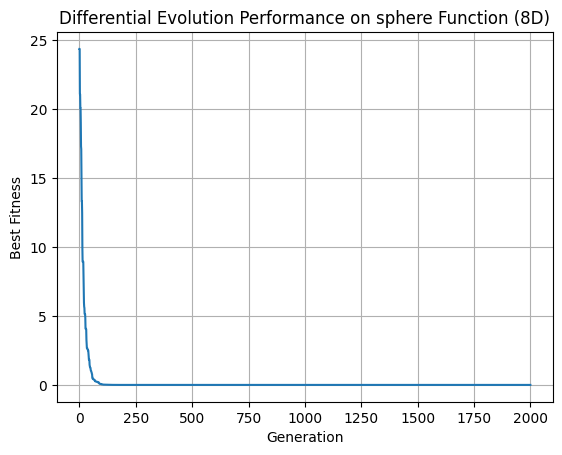

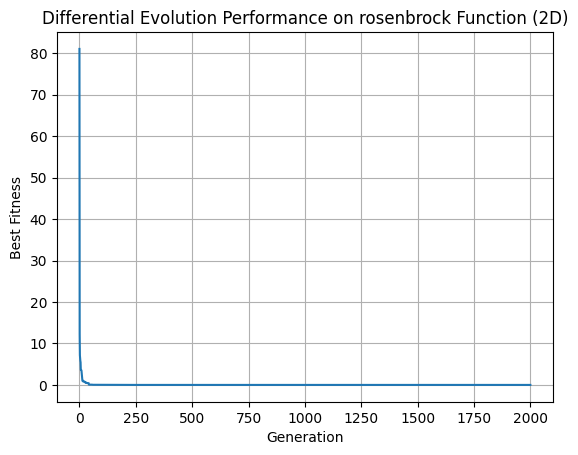

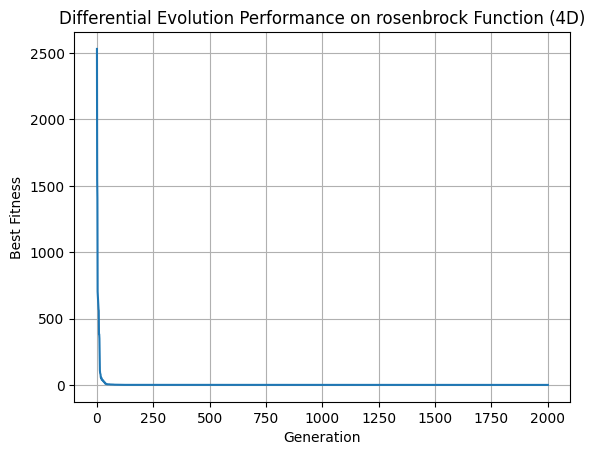

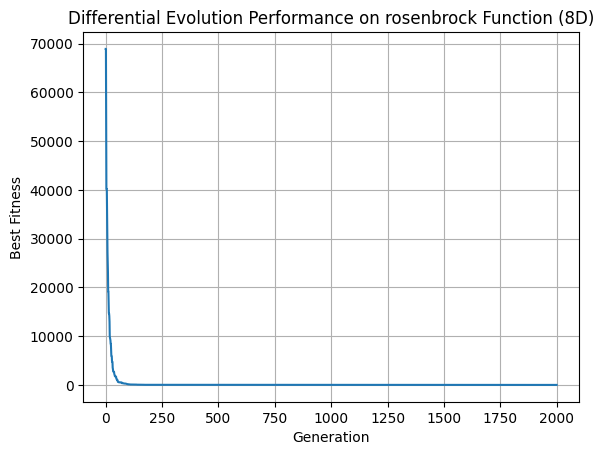

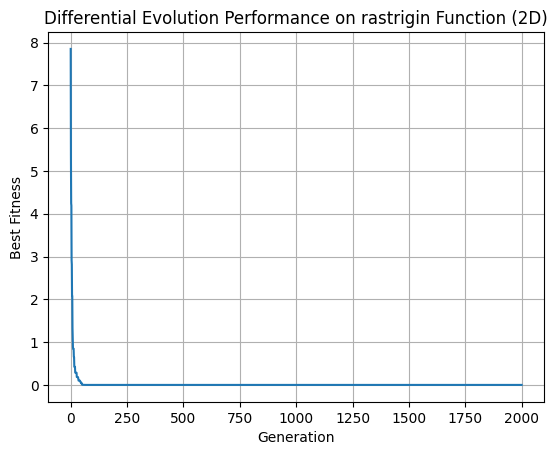

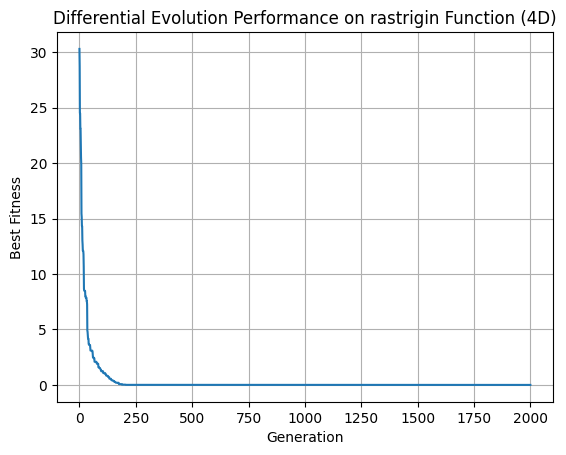

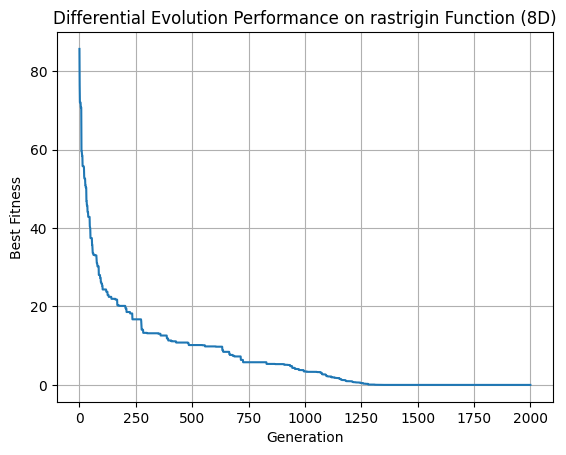

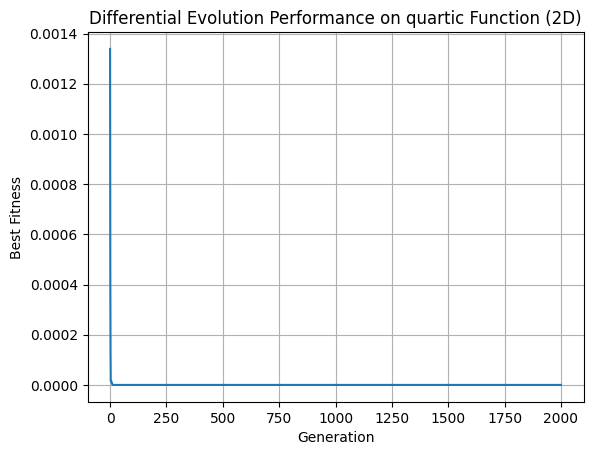

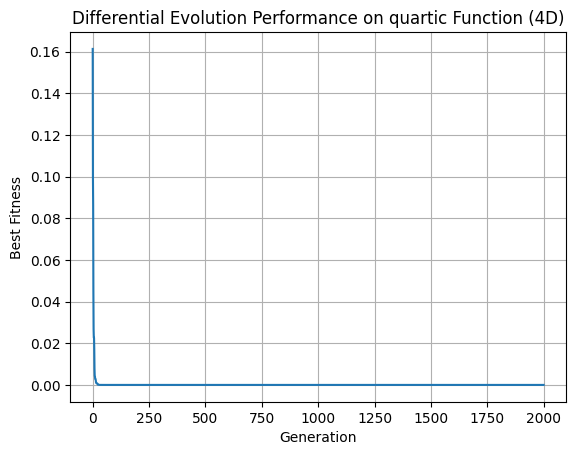

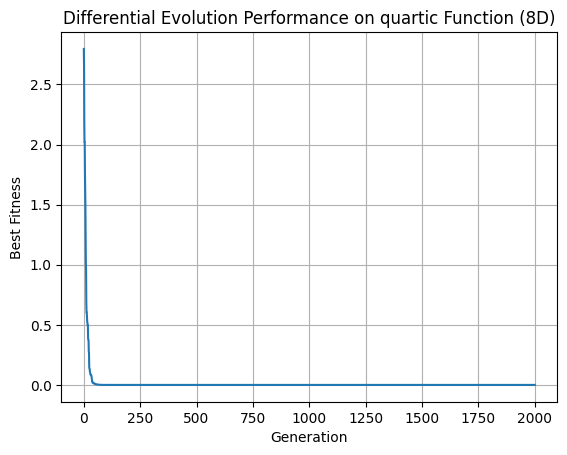

In [9]:
for func, func_name in zip(functions, function_names):
    for dim in dimensions:
        de_instance = DifferentialEvolution(func, dim, bounds[functions.index(func)], num_runs=num_runs, generations=generations)
        de_instance.plot()

## Conclusión


Después de ejecutar y evaluar el algoritmo de Evolución Diferencial en varias funciones y dimensiones, podemos ver que funciona bastante bien en problemas simples, como la función esfera, donde converge rápidamente hacia el óptimo global. Sin embargo, en funciones más complicadas como Rosenbrock o Rastrigin, el algoritmo puede tardar más en encontrar la solución óptima, especialmente a medida que aumenta la dimensionalidad del problema. Esto sugiere que la elección de la función de optimización y la dimensionalidad del problema juegan un papel crucial al seleccionar un algoritmo de optimización. En resumen, la Evolución Diferencial es una herramienta poderosa para resolver problemas de optimización, pero es importante ajustar adecuadamente los parámetros y considerar la complejidad del problema para obtener resultados óptimos.